# Cleaning datasets in pandas

- Describe data
- Drop duplicates
- Null values
    * Count nulls: `df.cylinders.isnull().sum()`
    * Fill nulls `df["cylinders"].fillna(0)`
    * Most nulls `df.isnull().sum().sort_values(ascending=False).head(10)`
- Sorting
    * `sort_values()`
    * Sort colums alphabetical `df = df[sorted(df.columns)]`
- Rename cols: `df = df.rename(columns={'make':'Manufacturer','displ':'Displacement'}, errors="raise")`
- Remove Outliers
    * Percentile
```python
d = [3,3,3,3,3,3,3,3,3,3,6,7,8]
print(min(d),np.percentile(d,70))
```
    * IQR: 
```python
stats = df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats[["25%","75%","IQR"]]
```

- Cut data (Categorize): 
    * By range: `pd.cut(coches_caros.year,5, labels=range(1980,2030,10))`
    * Custom  `pd.cut(coches_caros.year,bins=[1979,1989,1999,2009,2019], labels=range(1980,2020,10))`
    
- Aggregate
    * Single `coches_caros.groupby("decada").agg({"Displacement":"mean"}).plot.bar()`
    * Multiple `coches_caros.groupby("decada").agg({"Displacement":"mean", "cylinders":"mean"})`

- Apply
    * `apply()` in `Dataframe` vs `apply()` in `Series`
    * `apply(axis=1)`
    * `apply(result_type="broadcast")`

- Others:
     * `df._get_numeric_data()`
     * `df.to_csv("hola.csv")`
     


In [1]:
import pandas as pd

df = pd.read_csv('data/vehicles/vehicles_messy.csv')
print(df.shape)
df.head()

(37843, 83)


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [2]:
df.shape

(37843, 83)

In [3]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

## 1. Eliminar duplicados

In [4]:
makemodel = df[["make","model"]]
print(makemodel.shape)
print(makemodel.drop_duplicates().shape)
print(makemodel[["make"]].drop_duplicates().shape)
print(df.drop_duplicates().shape)

(37843, 2)
(3761, 2)
(133, 1)
(37843, 83)


## 2. Valores Nulos

In [5]:
df.isnull().head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False


In [6]:
df.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31705
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [7]:
for nameCol, numNulls in df.isnull().sum().items():
    if numNulls > 0:
        print(nameCol, numNulls)

cylinders 123
displ 120
drive 1189
eng_dscr 15403
trany 11
guzzler 35562
trans_dscr 22796
tCharger 32657
sCharger 37177
atvType 34771
fuelType2 36435
rangeA 36440
evMotor 37281
mfrCode 30818
c240Dscr 37806
c240bDscr 37807
startStop 31705


In [8]:
# Ver las columnas marca y modelo de los coches que no tienen cilindros
df[df["cylinders"].isnull()][["make","model"]]

,make,model
7138,Nissan,Altra EV
7139,Toyota,RAV4 EV
8143,Toyota,RAV4 EV
8144,Ford,Th!nk
8146,Ford,Explorer USPS Electric
...,...,...
30969,Kia,Soul Electric
30972,Tesla,Model S (60 kW-hr battery pack)
30973,Tesla,Model S AWD - 60D
30974,Tesla,Model S AWD - P100D


In [9]:
# ~ means not
df_clean = df[~df["cylinders"].isnull()]

In [10]:
df_clean.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [11]:
list(df_clean["make"].value_counts().items())

[('Chevrolet', 3790),
 ('Ford', 3089),
 ('Dodge', 2512),
 ('GMC', 2387),
 ('Toyota', 1912),
 ('BMW', 1697),
 ('Nissan', 1335),
 ('Mercedes-Benz', 1322),
 ('Volkswagen', 1113),
 ('Mitsubishi', 1018),
 ('Mazda', 944),
 ('Audi', 918),
 ('Pontiac', 893),
 ('Honda', 880),
 ('Porsche', 874),
 ('Jeep', 847),
 ('Subaru', 826),
 ('Volvo', 758),
 ('Chrysler', 703),
 ('Hyundai', 665),
 ('Buick', 630),
 ('Mercury', 609),
 ('Cadillac', 528),
 ('Plymouth', 525),
 ('Suzuki', 515),
 ('Kia', 493),
 ('Oldsmobile', 462),
 ('Isuzu', 434),
 ('Saab', 432),
 ('Lexus', 397),
 ('Infiniti', 349),
 ('Jaguar', 349),
 ('MINI', 320),
 ('Acura', 302),
 ('Lincoln', 283),
 ('Saturn', 278),
 ('Ferrari', 211),
 ('Rolls-Royce', 173),
 ('Eagle', 161),
 ('Geo', 147),
 ('Land Rover', 145),
 ('Aston Martin', 142),
 ('Bentley', 116),
 ('Maserati', 115),
 ('Lamborghini', 107),
 ('Peugeot', 98),
 ('Scion', 83),
 ('Daewoo', 67),
 ('Ram', 57),
 ('Lotus', 57),
 ('Renault', 56),
 ('Roush Performance', 53),
 ('Alfa Romeo', 45),
 ('F

In [12]:
df_clean["make"].value_counts().sort_values(ascending=False)

Chevrolet                           3790
Ford                                3089
Dodge                               2512
GMC                                 2387
Toyota                              1912
                                    ... 
Superior Coaches Div E.p. Dutton       1
E. P. Dutton, Inc.                     1
Lambda Control Systems                 1
Panoz Auto-Development                 1
Qvale                                  1
Name: make, Length: 129, dtype: int64

In [13]:
df_clean["make"].value_counts().reset_index().sort_values('index')

,index,make
74,AM General,6
123,ASC Incorporated,1
33,Acura,302
52,Alfa Romeo,45
57,American Motors Corporation,27
...,...,...
8,Volkswagen,1113
17,Volvo,758
55,Wallace Environmental,32
69,Yugo,8


In [14]:
nulls = df_clean.isnull().sum()
print(nulls)
pd.DataFrame(filter(lambda x: x[1] > 0,nulls.items()))

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31702
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64


,0,1
0,drive,1181
1,eng_dscr,15289
2,trany,2
3,guzzler,35439
4,trans_dscr,22673
5,tCharger,32536
6,sCharger,37054
7,atvType,34768
8,fuelType2,36312
9,rangeA,36317


In [15]:
nullvals = df_clean.isnull().sum()[df_clean.isnull().sum() > 0]
nullvals 

drive          1181
eng_dscr      15289
trany             2
guzzler       35439
trans_dscr    22673
tCharger      32536
sCharger      37054
atvType       34768
fuelType2     36312
rangeA        36317
evMotor       37277
mfrCode       30789
c240Dscr      37720
c240bDscr     37720
startStop     31702
dtype: int64

In [16]:
morethan100Nulls = df_clean.isnull().sum()[df_clean.isnull().sum() > 20000].index
morethan100Nulls

Index(['guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2',
       'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop'],
      dtype='object')

In [17]:
# Elimina las columnas en la lista con muchos nulos
df_clean = df_clean.drop(columns=morethan100Nulls)

In [18]:
df_clean.isnull().sum()[df_clean.isnull().sum() > 100]

drive        1181
eng_dscr    15289
dtype: int64

In [19]:
df_clean.isnull().sum()[df_clean.isnull().sum() > 0]

drive        1181
eng_dscr    15289
trany           2
dtype: int64

In [20]:
df_clean[["make","eng_dscr"]]

,make,eng_dscr
0,Alfa Romeo,(FFS)
1,Ferrari,(GUZZLER)
2,Dodge,(FFS)
3,Dodge,NaN
4,Subaru,"(FFS,TRBO)"
...,...,...
37838,Subaru,(FFS)
37839,Subaru,(FFS)
37840,Subaru,(FFS)
37841,Subaru,(FFS)


In [21]:
#Data wrangling: rellenamos los huecos nulos con valores 
df_clean["eng_dscr"] = df_clean.eng_dscr.fillna("")

In [22]:
df_clean.isnull().sum()[df_clean.isnull().sum() > 0]

drive    1181
trany       2
dtype: int64

In [23]:
df_clean[df_clean.trany.isnull()][["make","model","year","trany"]]

,make,model,year,trany
19097,Ford,F150 Pickup 2WD,1984,NaN
19128,GMC,C25 Pickup 2WD,1984,NaN


In [24]:
df_clean.trany.value_counts()

Automatic 4-spd                     11042
Manual 5-spd                         8308
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      676
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                           68
Auto(AV-S7)                       

In [25]:
# Clean the ford and the GMC
df_clean.loc[df_clean.trany.isnull(), "trany"] = ["Manual","Manual"]

In [26]:
df_clean.loc[df_clean.trany.isnull()]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb


In [27]:
df_clean.loc[df_clean.drive.isnull()]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
18217,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1984,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
18218,14.982273,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1984,-750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
18219,21.974000,0.0,0.0,0.0,13,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1984,-4250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
18220,21.974000,0.0,0.0,0.0,13,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1984,-4250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
18221,19.388824,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1984,-3000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20063,21.974000,0.0,0.0,0.0,13,0.0,0,0.0,0.0,0.0,...,0.0,Midsize-Large Station Wagons,1984,-4250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
20064,21.974000,0.0,0.0,0.0,13,0.0,0,0.0,0.0,0.0,...,0.0,Midsize-Large Station Wagons,1984,-4250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
20065,20.600625,0.0,0.0,0.0,14,0.0,0,0.0,0.0,0.0,...,0.0,Midsize-Large Station Wagons,1984,-3750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
20387,23.543571,0.0,0.0,0.0,14,0.0,0,0.0,0.0,0.0,...,0.0,Special Purpose Vehicles,1984,-5250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


In [28]:
df_clean["drive"] = df_clean.drive.fillna("NoTransmision")


In [29]:
df_clean.drive.value_counts()

Front-Wheel Drive             13241
Rear-Wheel Drive              12895
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2040
NoTransmision                  1181
4-Wheel Drive                  1062
2-Wheel Drive                   493
Part-time 4-Wheel Drive         159
2-Wheel Drive, Front              1
Name: drive, dtype: int64

In [30]:
# ALL DATA IS CLEANED
df_clean.isnull().sum()[df_clean.isnull().sum() > 0]

Series([], dtype: int64)

In [31]:
0+None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

# Clean by string matching

In [33]:
df_clean.trany.value_counts()

Automatic 4-spd                     11042
Manual 5-spd                         8308
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      676
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                           68
Auto(AV-S7)                       

In [39]:
df_clean.loc[df_clean["trany"].str.startswith("A"),"trany"] = "Auto"
df_clean.loc[df_clean["trany"].str.startswith("M"),"trany"] = "Manual"

In [40]:
df_clean["trany"].value_counts()

Auto      25332
Manual    12388
Name: trany, dtype: int64

# Where (categorizar o transformar)

In [ ]:
#df_clean.loc[<coches_Caros_find>,"expensive"] = True
#df_clean.loc[~<coches_Caros_find>,"expensive"] = False

In [49]:
import numpy as np

# Lista con los indices audi
#np.where(df_clean.make=="Audi") 

marcas_caras = ["Audi","Mercedes","Ferrari"]
df_clean["expensive"] = np.where(df_clean.make.isin(marcas_caras), True, False) 

In [50]:
df_clean[["make","expensive"]]

,make,expensive
0,Alfa Romeo,False
1,Ferrari,True
2,Dodge,False
3,Dodge,False
4,Subaru,False
...,...,...
37838,Subaru,False
37839,Subaru,False
37840,Subaru,False
37841,Subaru,False


# Categorizacion

In [60]:
df_clean.year.value_counts().reset_index().sort_values("index").set_index('index').year

index
1984    1964
1985    1699
1986    1209
1987    1247
1988    1130
1989    1153
1990    1078
1991    1132
1992    1121
1993    1093
1994     982
1995     967
1996     773
1997     762
1998     809
1999     845
2000     836
2001     906
2002     973
2003    1043
2004    1122
2005    1166
2006    1104
2007    1126
2008    1186
2009    1184
2010    1109
2011    1126
2012    1144
2013    1171
2014    1211
2015    1264
2016    1228
2017     857
Name: year, dtype: int64

In [61]:
df_clean["decada"] = pd.cut(df_clean.year,
                                bins=[1979,1989,1999,2009,2019], 
                                labels=range(1980,2020,10))


In [62]:
df_clean["decada"].value_counts()

2000    10646
1990     9562
2010     9110
1980     8402
Name: decada, dtype: int64

In [67]:
df_clean[(df_clean.decada == 2010) & (df_clean.make=="Subaru")].trany.value_counts()

Auto      87
Manual    72
Name: trany, dtype: int64

# Group by

In [76]:
df_clean.groupby("decada").agg({"cylinders":["mean","max","min"]})

cylinders           
            mean   max  min
decada                     
1980    5.419543  12.0  2.0
1990    5.653838  12.0  2.0
2000    5.991828  16.0  2.0
2010    5.823381  16.0  2.0

In [78]:
df_clean.groupby(["decada","make"]).agg({"cylinders":["mean","max","min"]})

cylinders          
                                        mean  max  min
decada make                                           
1980   AM General                   5.000000  6.0  4.0
       ASC Incorporated             6.000000  6.0  6.0
       Acura                        5.111111  6.0  4.0
       Alfa Romeo                   5.333333  6.0  4.0
       American Motors Corporation  5.407407  6.0  4.0
...                                      ...  ...  ...
2010   Volkswagen                   4.430976  6.0  4.0
       Volvo                        5.206250  8.0  4.0
       Wallace Environmental             NaN  NaN  NaN
       Yugo                              NaN  NaN  NaN
       smart                        3.000000  3.0  3.0

[516 rows x 3 columns]

In [80]:
df_clean[df_clean.expensive].groupby(["decada","make"]).agg({"cylinders":["mean","max","min"]})


cylinders           
                     mean   max  min
decada make                         
1980   Audi      4.858586   5.0  4.0
       Ferrari   9.176471  12.0  8.0
1990   Audi      5.761538   8.0  4.0
       Ferrari   9.511111  12.0  8.0
2000   Audi      5.954930  12.0  4.0
       Ferrari  10.387097  12.0  8.0
2010   Audi      5.886228  12.0  4.0
       Ferrari   9.839080  12.0  8.0

In [81]:
df_clean[df_clean.expensive].groupby(["year","make"]).agg({"cylinders":["mean","max","min"]})


cylinders           
                   mean   max  min
year make                         
1984 Audi      4.846154   5.0  4.0
1985 Audi      4.846154   5.0  4.0
     Ferrari   9.333333  12.0  8.0
1986 Audi      4.846154   5.0  4.0
     Ferrari   9.333333  12.0  8.0
...                 ...   ...  ...
2015 Ferrari   9.142857  12.0  8.0
2016 Audi      5.302326  12.0  4.0
     Ferrari  10.285714  12.0  8.0
2017 Audi      5.515152  10.0  4.0
     Ferrari  10.153846  12.0  8.0

[67 rows x 3 columns]

In [89]:
df_clean[df_clean.expensive].groupby(["cylinders","make"]).agg({"year":"min"})

year
cylinders make         
4.0       Audi     1984
5.0       Audi     1984
6.0       Audi     1992
8.0       Audi     1990
          Ferrari  1985
10.0      Audi     2007
12.0      Audi     2005
          Ferrari  1985

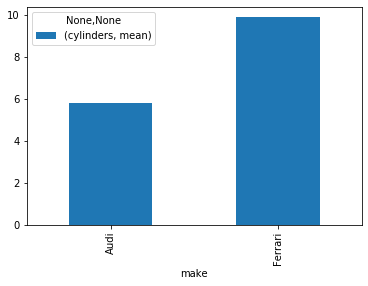

In [97]:
%matplotlib inline
data = df_clean[df_clean.expensive].groupby(["make"]).agg({"cylinders":["mean"]})

data.plot.bar()

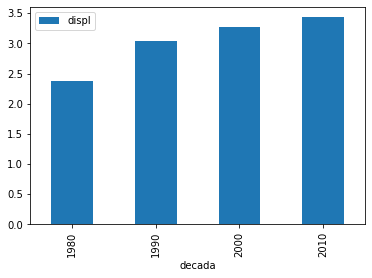

In [101]:
df_clean[df_clean.expensive].groupby("decada").agg({"displ":"mean"}).plot.bar()

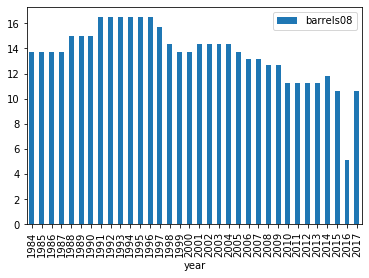

In [106]:
df_clean[df_clean.expensive].groupby(["year"]).agg({"barrels08":"min"}).plot.bar()


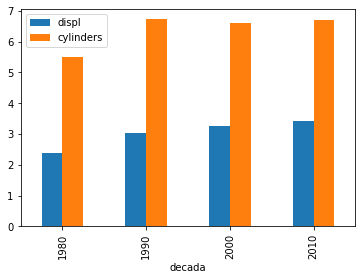

In [109]:
df_clean[df_clean.expensive].groupby("decada").agg({
        "displ":"mean", 
        "cylinders":"mean"
}).plot.bar()

# Apply

In [112]:
df_clean["displ"].describe()

count    37720.000000
mean         3.318409
std          1.361199
min          0.600000
25%          2.200000
50%          3.000000
75%          4.300000
max          8.400000
Name: displ, dtype: float64

In [120]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply
# Apply in series -> processes per value
def fn(value):
    return "big" if value >= 4 else "small"

df_clean["displacement_category"] = df_clean["displ"].apply(fn)

In [121]:
df_clean[["displacement_category","displ"]]

,displacement_category,displ
0,small,2.0
1,big,4.9
2,small,2.2
3,big,5.2
4,small,2.2
...,...,...
37838,small,2.2
37839,small,2.2
37840,small,2.2
37841,small,2.2


In [126]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html?highlight=apply#pandas.DataFrame.apply
# Apply in dataframes -> processes per columns

def fn(columnSeries):
    return columnSeries*2

df_clean[["year","make"]].apply(fn)

,year,make
0,3970,Alfa RomeoAlfa Romeo
1,3970,FerrariFerrari
2,3970,DodgeDodge
3,3970,DodgeDodge
4,3986,SubaruSubaru
...,...,...
37838,3986,SubaruSubaru
37839,3986,SubaruSubaru
37840,3986,SubaruSubaru
37841,3986,SubaruSubaru


In [142]:
# Apply in dataframes (axis=1) -> processes per rows

def fn(rowSeries):
    prefix = "classic"
    if rowSeries.year > 2000:
        prefix = "new"    
    return f"{prefix}-{rowSeries.make}"

df_clean["newname"] = df_clean[["year","make"]].apply(fn, axis=1)

In [137]:
df_analysis = df_clean[["make","model","year","decada","trany","displacement_category","expensive"]]

In [140]:
# GUARDAR EL CSV LIMPIO
df_analysis.to_csv("data/vehicles_limpio.csv")

In [145]:
df["newyear"] = df.year.astype(str) + df.make

In [146]:
df["newyear"]

0        1985Alfa Romeo
1           1985Ferrari
2             1985Dodge
3             1985Dodge
4            1993Subaru
              ...      
37838        1993Subaru
37839        1993Subaru
37840        1993Subaru
37841        1993Subaru
37842        1993Subaru
Name: newyear, Length: 37843, dtype: object